In [31]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import scipy.io

In [32]:
# vstupní proměnné
amp = 5
frekv = 2
vzorkFrekv = 1024
delka = np.arange(0, np.pi/4, 1/vzorkFrekv)
funkce = amp*np.sin(2*np.pi*delka*frekv)

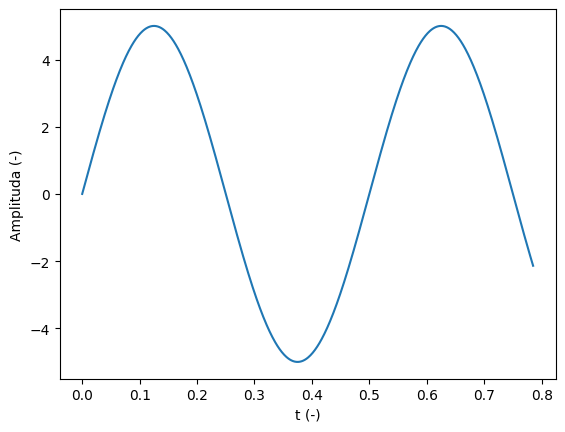

In [33]:
plt.plot(delka, funkce)
plt.xlabel("t (-)")
plt.ylabel("Amplituda (-)")
plt.show()

In [34]:
# analytický výpočet střední hodnoty a energie
strHodnota = (1/(delka[-1] - delka[0]))*np.trapz(funkce, delka, 1/vzorkFrekv)
print(f"Střední hodnota: {strHodnota:.3f}")

delka2 = np.arange(0, 2*np.pi, 1/vzorkFrekv)
funkce2 = np.sin(2*np.pi*frekv*delka2)
energie = np.trapz(funkce2**2, delka2)
print(f"Energie: {energie:.3f}")

Střední hodnota: 0.965
Energie: 3.127


In [64]:
# symbolický výpočet
t = sy.symbols("t") # symbolická proměnná
funkceSymb = amp*sy.sin(2*sy.pi*frekv*t)

# symbolický výpočet střední hodnoty
strHodnotaSymb = (1/(sy.pi/4))*sy.integrate(funkceSymb)
print(f"Symbolický výpočet střední hodnoty: {(1/(sy.pi/4))*sy.integrate(funkceSymb, (t, 0, np.pi/4)).evalf():.3f}")
strHodnotaSymb

Symbolický výpočet střední hodnoty: 0.964


-5*cos(4*pi*t)/pi**2

In [65]:
# symbolický výpočet energie
funkceSymb2 = sy.sin(2*sy.pi*frekv*t)
energieSymb = sy.integrate(funkceSymb2**2)
print(f"Symbolický výpočet střední hodnoty: {sy.integrate(funkceSymb2**2, (t, 0, 2*np.pi)).evalf():.3f}")
energieSymb

Symbolický výpočet střední hodnoty: 3.127


(2*pi*t - sin(4*pi*t)*cos(4*pi*t)/2)/(4*pi)

In [29]:
# načtení MAT souboru a výběr jednoho signálu
matFile = scipy.io.loadmat("ECG_Test.mat")
ecgSignal = matFile['val'][0, 0:3000]
ecgSignal, ecgSignal.size

(array([60, 60, 67, ..., 39, 60, 69], dtype=int16), 3000)

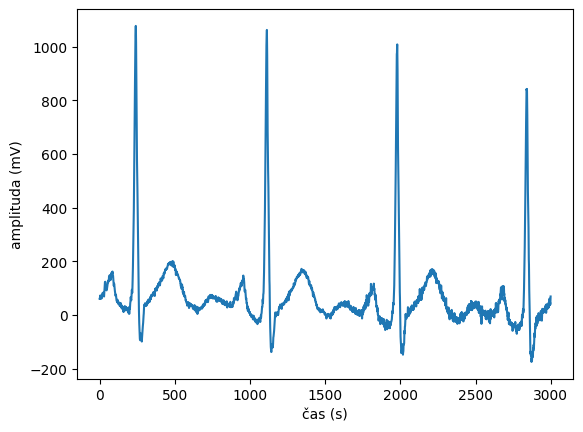

In [36]:
plt.plot(ecgSignal)
plt.xlabel("čas (s)")
plt.ylabel("amplituda (mV)")
plt.show()

In [31]:
ampSpec = np.fft.fft(ecgSignal) # amplitudové spektrum
N = len(ecgSignal) # délka signálu
normalize = N/2 # normalizace
samplingRate = 1024.0 # vzorkovací frekvence
freq = np.fft.fftfreq(N, d=1.0/samplingRate) # výpočet frekvenční osy
normAmplitude = np.abs(ampSpec)/normalize # normalizace amplitudy

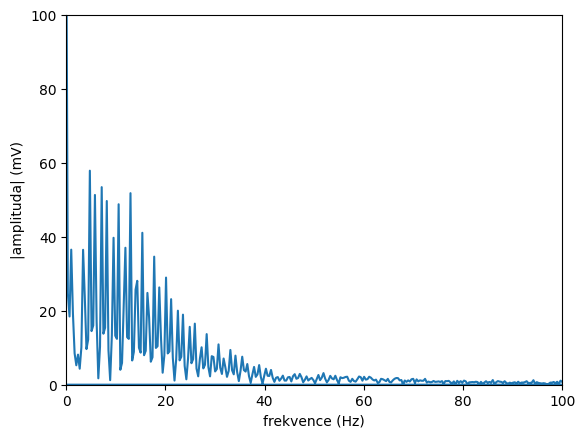

In [37]:
plt.plot(freq, normAmplitude)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("frekvence (Hz)")
plt.ylabel("|amplituda| (mV)")
plt.show()